In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection
from matplotlib.colors import SymLogNorm, LogNorm, Normalize
from astropy.table import Table
from astropy.io import fits
import numpy as np

In [2]:
img_name = '20210519T214650_5ppgcsq7_img4_galimg'

In [3]:
img = fits.open(f'/home/aalvarez/Work/Data/SX/andale/{img_name}.fits')[0].data
model = fits.open(f'/home/aalvarez/Work/Data/SX/andale/check_model_{img_name}_1.fits')[0].data
residual = fits.open(f'/home/aalvarez/Work/Data/SX/andale/check_residual_{img_name}_1.fits')[0].data

In [4]:
cat = Table.read('/home/aalvarez/Work/Data/SX/andale/img4_cat.fits')

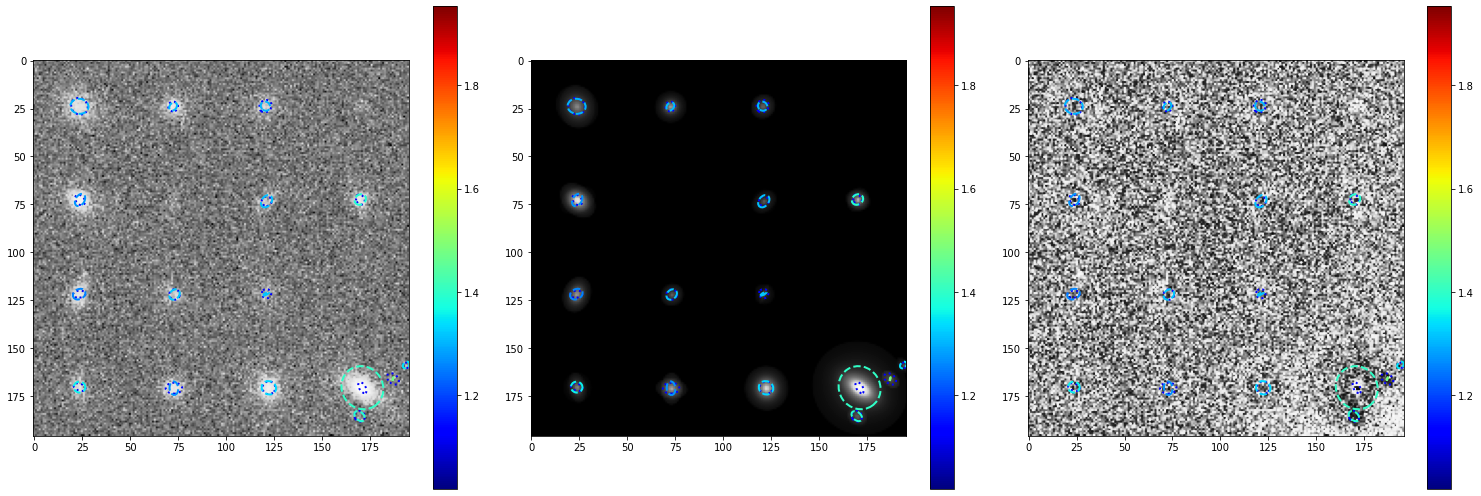

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(21,7), squeeze=False)

axes[0,0].imshow(img, cmap='Greys_r', norm=SymLogNorm(3))
axes[0,1].imshow(model, cmap='Greys_r', norm=SymLogNorm(10))
axes[0,2].imshow(residual, cmap='Greys_r', norm=SymLogNorm(1))

sersic_cmap = plt.get_cmap('jet')
sersic_norm = Normalize(0, 4)

for ax in axes.ravel():
    offsets = np.column_stack([cat['mf_x']-1, cat['mf_y']-1])
    ec = EllipseCollection(
        heights=cat['mf_rad'], widths=cat['mf_rad']*cat['mf_ratio'], angles=52.3*cat['mf_angle'], offsets=offsets,
        units='x', transOffset=ax.transData
    )
    ec.set_facecolor('none')
    ec.set_edgecolor('blue')
    ec.set_linestyle(':')
    ec.set_linewidth(2)
    
    ec2 = EllipseCollection(
        heights=cat['mf_sersic_rad'], widths=cat['mf_sersic_rad']*cat['mf_sersic_ratio'], angles=52.3*cat['mf_sersic_angle'], offsets=offsets,
        units='x', transOffset=ax.transData, cmap=sersic_cmap
    )
    ec2.set_array(cat['mf_sersic'])
    ec2.set_edgecolor(sersic_cmap(sersic_norm(cat['mf_sersic'])))
    ec2.set_linestyle('--')
    ec2.set_linewidth(2)
    ec2.set_facecolor('none')
    
    ax.add_collection(ec)
    ax.add_collection(ec2)
        
    plt.colorbar(ec2, ax=ax)
    
plt.tight_layout()
plt.savefig('/home/aalvarez/Downloads/with_prior.png')
plt.show()